In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("weatherAUS.csv")

In [14]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [16]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [18]:
df['RainTomorrow'] = df['RainTomorrow'].replace(['Yes', 'No'], [1,0])

In [19]:
df.shape

(8425, 23)

In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8186.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.243220
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,0.429053
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,0.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,0.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,0.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000


In [21]:
df.reset_index(drop=True,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [23]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

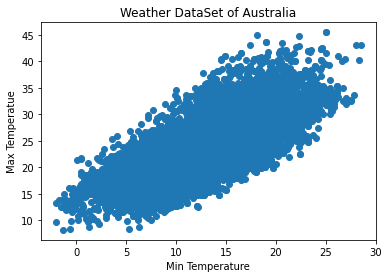

In [24]:
fix, ax = plt.subplots()
ax.scatter(df['MinTemp'], df['MaxTemp'])
ax.set_title('Weather DataSet of Australia')
ax.set_xlabel('Min Temperature')
ax.set_ylabel('Max Temperatue')
plt.show()

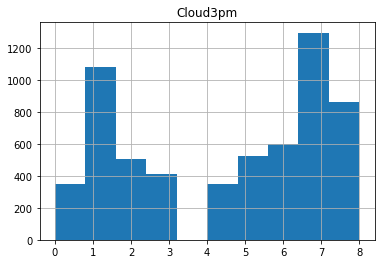

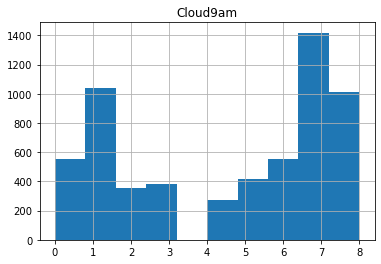

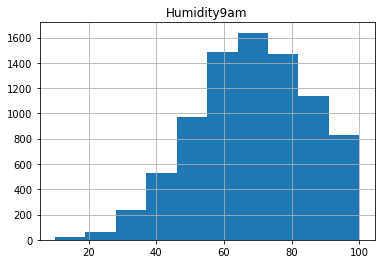

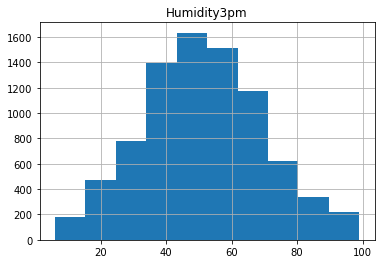

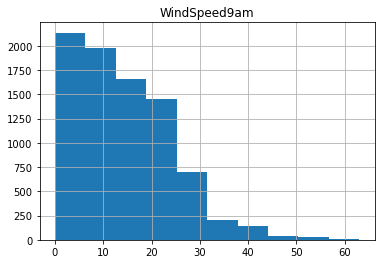

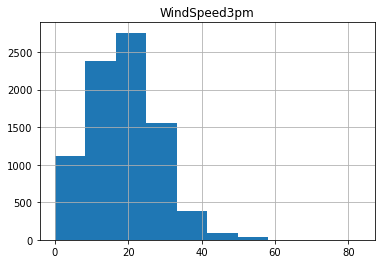

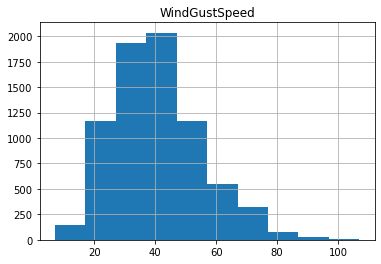

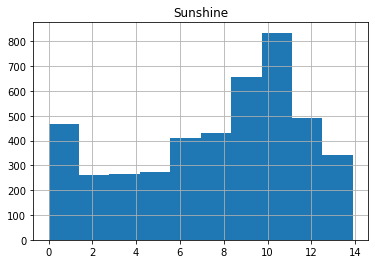

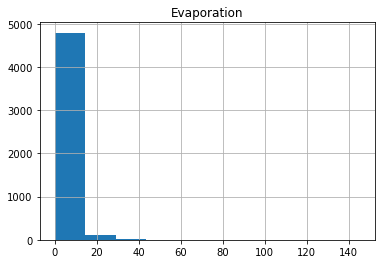

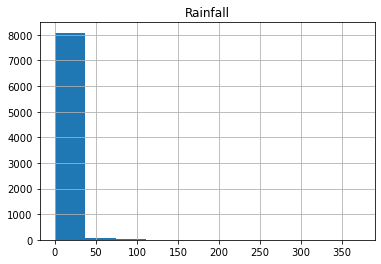

In [25]:
df.hist('Cloud3pm')
df.hist('Cloud9am')
df.hist('Humidity9am')
df.hist('Humidity3pm')
df.hist('WindSpeed9am')
df.hist('WindSpeed3pm')
df.hist('WindGustSpeed')
df.hist('Sunshine')
df.hist('Evaporation')
df.hist('Rainfall')
plt.show()

In [26]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652,0.099464
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665,-0.154657
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263,0.225180
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156,-0.081179
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057,-0.471405
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872,0.211384
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619,0.073335
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201,0.058073
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788,0.279701
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634,0.457160


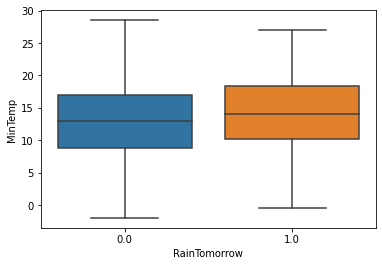

In [27]:
sns.boxplot(x = df["RainTomorrow"], y = df["MinTemp"])
plt.show()

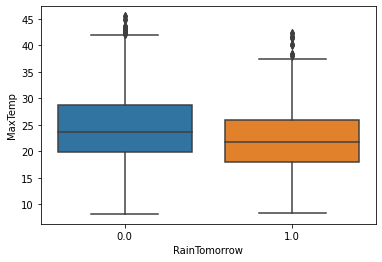

In [29]:
sns.boxplot(x = df["RainTomorrow"], y = df["MaxTemp"])
plt.show()

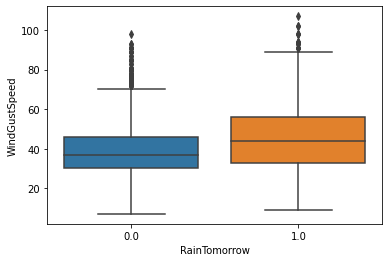

In [30]:
sns.boxplot(x = df["RainTomorrow"], y = df["WindGustSpeed"])
plt.show()

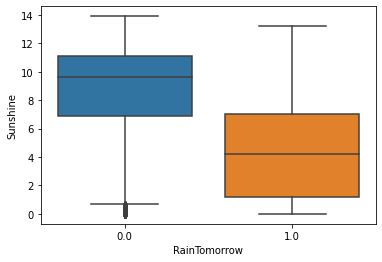

In [31]:
sns.boxplot(x = df["RainTomorrow"], y = df["Sunshine"])
plt.show()

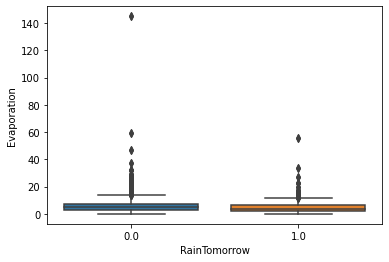

In [32]:
sns.boxplot(x = df["RainTomorrow"], y = df["Evaporation"])
plt.show()

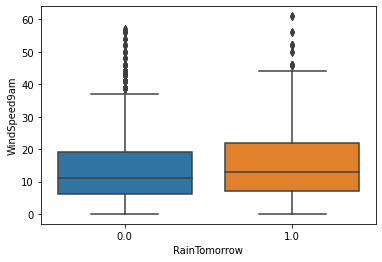

In [33]:
sns.boxplot(x = df["RainTomorrow"], y = df["WindSpeed9am"])
plt.show()

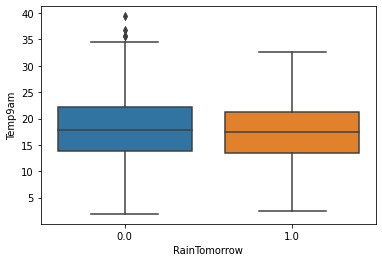

In [34]:
sns.boxplot(x = df["RainTomorrow"], y = df["Temp9am"])
plt.show()

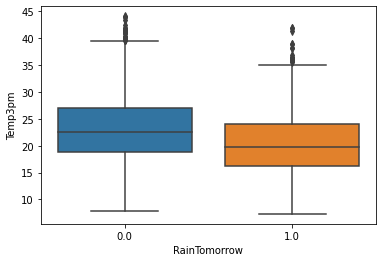

In [35]:
sns.boxplot(x = df["RainTomorrow"], y = df["Temp3pm"])
plt.show()

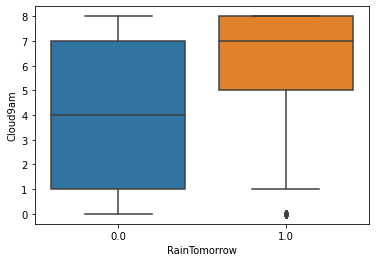

In [36]:
sns.boxplot(x = df["RainTomorrow"], y = df["Cloud9am"])
plt.show()

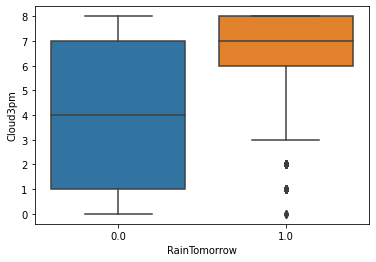

In [37]:
sns.boxplot(x = df["RainTomorrow"], y = df["Cloud3pm"])
plt.show()

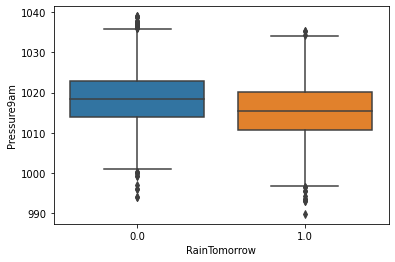

In [38]:
sns.boxplot(x = df["RainTomorrow"], y = df["Pressure9am"])
plt.show()

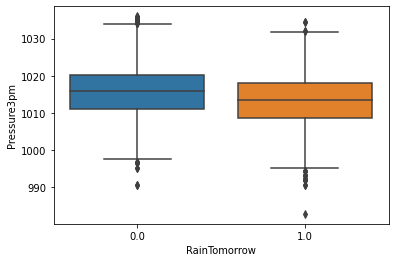

In [39]:
sns.boxplot(x = df["RainTomorrow"], y = df["Pressure3pm"])
plt.show()

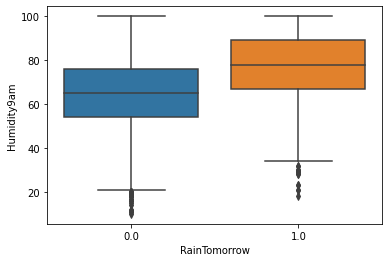

In [40]:
sns.boxplot(x = df["RainTomorrow"], y = df["Humidity9am"])
plt.show()

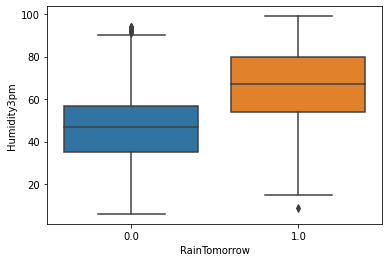

In [41]:
sns.boxplot(x = df["RainTomorrow"], y = df["Humidity3pm"])
plt.show()

In [43]:
df = df.drop(['Date'], axis = 1)
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0


In [44]:
df = df.dropna(subset = ['RainToday'])
df.fillna(0, inplace = True)
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,0.0
1,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,0.0
2,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0.0
3,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,0.0
4,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0


In [45]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [46]:
def set_directions(x):
    if x == 'NNW' or x == 'N' or x == 'NNE':
        return 'N'
    elif x == 'ENE' or x == 'E' or x =='ESE':
        return 'E'
    elif x == 'SSE' or x == 'S' or x == 'SSW':
        return 'S'
    elif x == 'WSW' or x == 'W' or x == 'WNW':
        return 'W'
    elif x == 'NE':
        return 'NE'
    elif x == 'SE':
        return 'SE'
    elif x == 'SW':
        return 'SW'
    elif x == 'NW':
        return 'NW'

In [47]:
df['WindGustDir'] = df["WindGustDir"].apply(set_directions)
df['WindDir9am'] = df['WindDir9am'].apply(set_directions)
df['WindDir3pm'] = df['WindDir3pm'].apply(set_directions)

In [48]:
df.WindDir3pm.unique()

array(['W', 'E', 'NW', 'S', 'N', 'SW', 'SE', None, 'NE'], dtype=object)

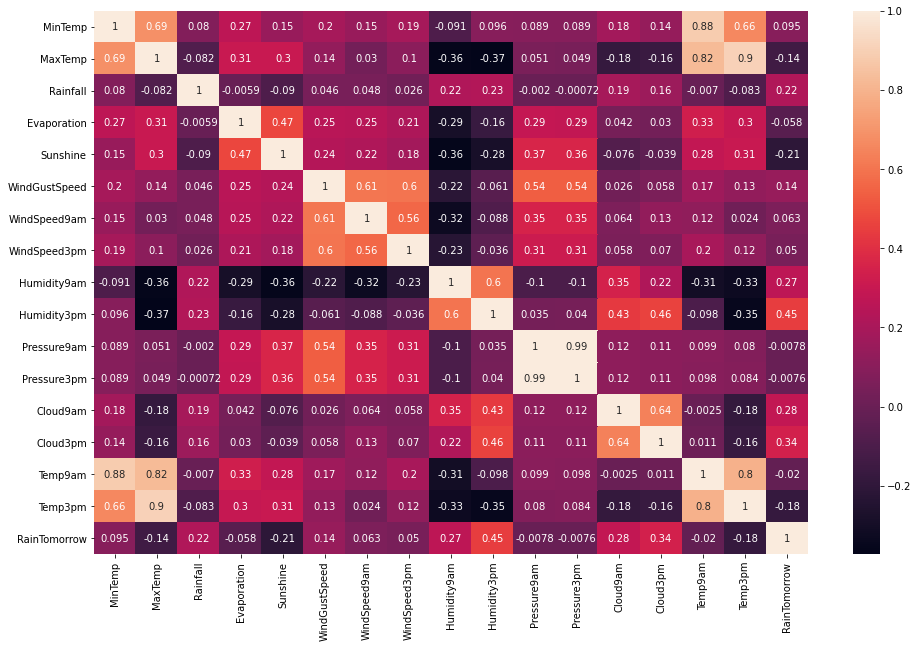

In [49]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), square=False, ax=ax, annot = True);

In [50]:
df = pd.get_dummies(df, columns = ['RainToday'])
df = pd.get_dummies(df, columns = ['WindDir3pm'])
df = pd.get_dummies(df, columns = ['WindDir9am', 'WindGustDir'])
df = pd.get_dummies(df, columns = ['Location'])

df['RainTomorrow'].value_counts()

0.0    6261
1.0    1924
Name: RainTomorrow, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8185 entries, 0 to 8424
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                8185 non-null   float64
 1   MaxTemp                8185 non-null   float64
 2   Rainfall               8185 non-null   float64
 3   Evaporation            8185 non-null   float64
 4   Sunshine               8185 non-null   float64
 5   WindGustSpeed          8185 non-null   float64
 6   WindSpeed9am           8185 non-null   float64
 7   WindSpeed3pm           8185 non-null   float64
 8   Humidity9am            8185 non-null   float64
 9   Humidity3pm            8185 non-null   float64
 10  Pressure9am            8185 non-null   float64
 11  Pressure3pm            8185 non-null   float64
 12  Cloud9am               8185 non-null   float64
 13  Cloud3pm               8185 non-null   float64
 14  Temp9am                8185 non-null   float64
 15  Temp

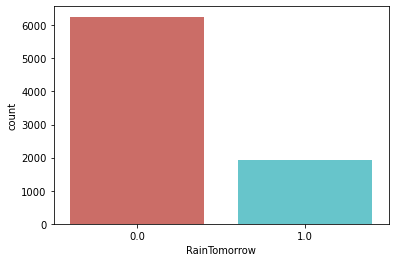

In [52]:
sns.countplot(x = 'RainTomorrow', data = df, palette = 'hls')
plt.show()

In [53]:
count_rainTomorrow = len(df[df['RainTomorrow'] == 1])
count_notRainTomorrow = len(df[df['RainTomorrow'] == 0])
percent_rainTomorrow = count_rainTomorrow / (count_rainTomorrow + count_notRainTomorrow)
percent_notRainTomorrow = count_notRainTomorrow / (count_rainTomorrow + count_notRainTomorrow)
print("Percentage of Rain Tomorrow:", percent_rainTomorrow*100)
print("Percentage of not Raining Tomorrow:", percent_notRainTomorrow*100)

Percentage of Rain Tomorrow: 23.50641417226634
Percentage of not Raining Tomorrow: 76.49358582773365


In [54]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df.RainTomorrow

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [55]:
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)


LogisticRegression()

In [56]:
Predictions = logit_model.predict(x_test)

In [57]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      1887
         1.0       0.65      0.46      0.54       569

    accuracy                           0.82      2456
   macro avg       0.75      0.69      0.71      2456
weighted avg       0.80      0.82      0.81      2456



In [58]:
#Confusion Matrix
print(confusion_matrix(y_test, Predictions))

[[1747  140]
 [ 309  260]]


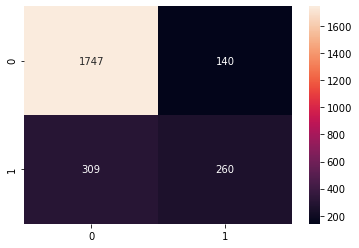

In [59]:
sns.heatmap(confusion_matrix(y_test, Predictions), annot=True, fmt="d")
plt.show()

In [60]:
TP = 31029
TN = 3748
FP = 1765
FN = 5095

#Accuracy
#Accuracy = (TP + TN)/Total

Accuracy = (TP + TN)/(TP+TN+FP+FN)

#Error Rate
#ErrorRate = (FP+FN)/Total

Error = (FP + FN)/(TP+TN+FP+FN)

print("Accuracy:", Accuracy*100)
print("Error:", Error*100)


Accuracy: 83.52426927972716
Error: 16.475730720272836


In [61]:
# Random forest

clf_rf = RandomForestClassifier(random_state=23)      
clr_rf = clf_rf.fit(x_train,y_train)

In [62]:
y_predict = clf_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_predict )
print('Accuracy: ', accuracy)

Accuracy:  0.886400651465798


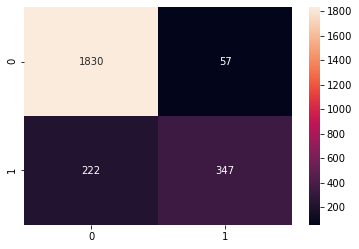

In [63]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt="d")
plt.show()

In [64]:
TP = 31445
TN = 4690
FP = 1349
FN = 4753

#Accuracy
#Accuracy = (TP + TN)/Total

Accuracy = (TP + TN)/(TP+TN+FP+FN)

#Error Rate
#ErrorRate = (FP+FN)/Total

Error = (FP + FN)/(TP+TN+FP+FN)

print("Accuracy:", Accuracy*100)
print("Error:", Error*100)

Accuracy: 85.55295120392074
Error: 14.447048796079267
